In [1]:
# Edit this cell to print out your name.
print "My name is %s" % ("Mike Adamski")

My name is Mike Adamski


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [17]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

nmonths = 100000 #number of months to simulate
nOccurances = 0 #counter variable

for i in range(0,nmonths): #loops through number of months
    nrain = 0 #resets number of days rained for the month to zero
    days = np.random.randint(1,6,30) #each number has 20% chance
    for j in range(0,len(days)):  
        if days[j] == 1: #day equal to one is my 20% rainy day number (one symbolizes rain)
            nrain +=1
    if nrain == 1: #if only one rainfall at the end of the month
        nOccurances += 1
print "The number of occurances is %d within %d months!" % (nOccurances,nmonths)    
print "The percent of occuring is: %0.3f%%" % (nOccurances/float(nmonths)*100.)


The number of occurances is 852 within 100000 months!
The percent of occuring is: 0.852%


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [11]:
nmonths = 100000 #number of months to simulate
nOccurances = 0 #counter variable

for i in range(0,nmonths): #loops through number of months
    nrain = 0 #resets rain for the month to zero
    days = np.random.randint(1,11,30) #each number has a 10% chance
    for j in range(0,len(days)):  
        if days[j] == 1: #day equal to one is my 10% rainy day number (one symbolizes rain)
            nrain +=1
    if nrain >= 8: #if only one rainfall at the end of the month
        nOccurances += 1
print "The number of occurances is %d within %d months!" % (nOccurances,nmonths)    
print "The percent of occuring is: %0.3f%%" % (nOccurances/float(nmonths)*100.)

The number of occurances is 776 within 100000 months!
The percent of occuring is: 0.776%


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [18]:
nMonths = 100000 #number of months
testPass = 0 #counter
totalTests = 0 #coutner
arrayDay = [] #will be used to store all Monte Carlo trials
#####################################
def cmRained(nDays):
    thisRain = 0 #sum variable
    for i in range(0,nDays):
        chance = np.random.randint(1,11,nDays) #each number has 10% chance of occurring
        if chance[i] >= 1 and chance[i] <= 2: #20% chance
            thisRain += 1
        elif chance[i] >= 3 and chance[i] <= 5: #30% chance
            thisRain += 2
        elif chance[i] >= 6 and chance[i] <= 8: #30% chance
            thisRain += 3
        elif chance[i] == 9: #10% chance
            thisRain += 4
        elif chance[i] == 10: #10% chance
            thisRain += 5
    return thisRain
#####################################
for i in range(0,nMonths):
    numDays = 0 #resets number of days rained in the month to zero
    numPrev = 0 #resets consecutive days rained to zero
    chance = np.random.randint(1,11) #simulates first day of the month
    if chance == 1:#separate first day case (might be redundant since every "normal" day is 10%)
        numPrev += 1
        numDays += 1
    nextChance = np.random.randint(1,21,29) #29 because we already simulated first seperate case
    for i in range(0,len(nextChance)):
        if numPrev == 1: #rained the day prior
            if nextChance[i] >= 1 and nextChance[i] <= 4: #simulates a 20% chance
                numPrev += 1
                numDays += 1
            else:
                numPrev = 0
        elif numPrev == 2: #rained two days consecutively 
            if nextChance[i] >= 1 and nextChance[i] <= 5: #simulates a 25% chance
                numPrev += 1
                numDays += 1
            else:
                numPrev = 0
        elif numPrev >= 3: #rained three days consecutively
            if nextChance[i] == 1: #simulates 5% chance
                numPrev += 1
                numDays += 1
            else:
                numPrev = 0
        else:
            if nextChance[i] == 1 or nextChance[i] == 2: #simulates 10% chance
                numPrev += 1
                numDays += 1
            else:
                numPrev = 0
    if cmRained(numDays) > 10: #did it rain more than 10cm this month?
        testPass += 1
        totalTests += 1
    else:
        totalTests += 1
    arrayDay.append(cmRained(numDays)) #appends the resulting rain for the month to arrayDay
#####################################  
testPass = float(testPass) 
totalTests = float(totalTests)
percentChance = (testPass/totalTests)*100
print "The odds of getting 10cm of rain in a given month is approximately: %.3f %%" % (percentChance)
#####################################
myTrials = arrayDay #creates a myTrials variable with all the values of arrayDay

The odds of getting 10cm of rain in a given month is approximately: 33.074 %


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

<IPython.core.display.Javascript object>


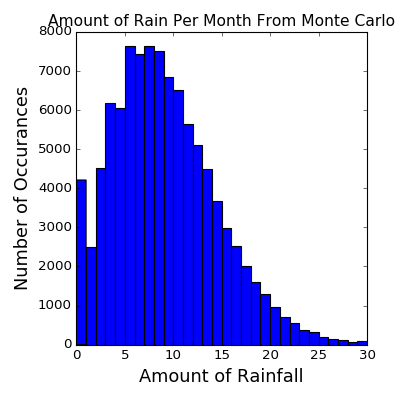

In [29]:
plt.figure(figsize=(5,5))

plt.hist(myTrials,bins=30,range=(0,30)) 

plt.xlabel("Amount of Rainfall",fontsize=16)
plt.ylabel("Number of Occurances",fontsize=16)

plt.title("Amount of Rain Per Month From Monte Carlo",fontsize=14)
plt.tight_layout()

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [30]:
total = 0 #sum variable
for i in range(0,len(myTrials)):
    total += myTrials[i]
avg = float(total)/len(myTrials)
print "The average amount of rainfall in a month is: %.3f" % (avg)

The average amount of rainfall in a month is: 8.650


### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [31]:
thisTrial = myTrials #copy array 
thisTrial.sort() #sorts copy array in ascending order
print "Sorting data values!"
numEntries = len(thisTrial) - (len(thisTrial) * .975) #2.5% of length
numEntries = int(numEntries)
print "Number of data entries prior to removal:\t\t %.0f" % (len(thisTrial))
thisTrial = thisTrial[numEntries:] #bottom removal 
print "Number of data entries after removing bottom 2.5%%:\t %.0f" % (len(thisTrial))
thisTrial = thisTrial[:(len(thisTrial)-numEntries)] #top removal
print "Number of data entries after removing top 2.5%%:\t\t %.0f" % (len(thisTrial))
print
start = thisTrial[0]
end = thisTrial[len(thisTrial)-1]
print "Bottom range edge at index [0] is:\t %.0f" % (start)
print "Top range edge at index [length-1] is:\t %.0f" % (end)
print
print "I'm 95%% confident that the rainfall will be between %.0f and %.0f." % (start,end)


Sorting data values!
Number of data entries prior to removal:		 100000
Number of data entries after removing bottom 2.5%:	 97500
Number of data entries after removing top 2.5%:		 95000

Bottom range edge at index [0] is:	 0
Top range edge at index [length-1] is:	 21

I'm 95% confident that the rainfall will be between 0 and 21.
